In [1]:
from keras import layers
from keras import models
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle
from tensorflow.python.client import device_lib
import itertools
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3342595243442792780
]


[]

In [2]:
def getTargetNames(validation_generator):
    dictionary = validation_generator.class_indices
    result = []
    result_indexes = []
    for x in dictionary:
        #print(x)
        result.append(x)
        result_indexes.append(dictionary[x])
    return result, result_indexes

In [4]:
train_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/train"
validation_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/validation"
test_dir = "C:/Users/Ilker/Desktop/Tomaten_Voter/test"

# Rescales all images by 1/255
#rain_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print(test_generator.class_indices)
target_names, target_index = getTargetNames(validation_generator)

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'C:/Users/Ilker/Desktop/Tomaten_Voter/train'

In [5]:
#######Experiermentier Voter1
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.15))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dropout(0.6))
#model.add(layers.Dense(256, activation='relu' ,kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=1e-3),
metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)      

In [5]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint('C:/Users/Ilker/Desktop/best_model_voter2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=230,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=43,
    callbacks = [es, mc])

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
230/230 [==============================] - 60s 259ms/step - loss: 0.9943 - acc: 0.5881 - val_loss: 0.6480 - val_acc: 0.7489

Epoch 00001: val_loss improved from inf to 0.64801, saving model to C:/Users/Ilker/Desktop/best_model_voter2.h5
Epoch 2/100
230/230 [==============================] - 57s 249ms/step - loss: 0.5395 - acc: 0.7982 - val_loss: 0.7090 - val_acc: 0.7143

Epoch 00002: val_loss did not improve from 0.64801
Epoch 3/100
230/230 [==============================] - 57s 250ms/step - loss: 0.4635 - acc: 0.8220 - val_loss: 0.5454 - val_acc: 0.7751

Epoch 00003: val_loss improved from 0.64801 to 0.54538, saving model to C:/Users/Ilker/Desktop/best_model_voter2.h5
Epoch 4/100
230/230 [==============================] - 58s 252ms/step - loss: 0.4007 - acc: 0.8412 - val_loss: 0.5508 - val_acc: 0.7713

Epoch 00004: val_loss did not improve from 0.54538
Epoch 5/100
230/230 [==============================] - 58s 251ms/step - lo

230/230 [==============================] - 58s 251ms/step - loss: 0.1116 - acc: 0.9663 - val_loss: 0.2361 - val_acc: 0.9339

Epoch 00081: val_loss did not improve from 0.12406
Epoch 82/100
230/230 [==============================] - 58s 251ms/step - loss: 0.0918 - acc: 0.9703 - val_loss: 0.2607 - val_acc: 0.9126

Epoch 00082: val_loss did not improve from 0.12406
Epoch 83/100
230/230 [==============================] - 58s 251ms/step - loss: 0.0942 - acc: 0.9704 - val_loss: 0.1493 - val_acc: 0.9430

Epoch 00083: val_loss did not improve from 0.12406
Epoch 84/100
230/230 [==============================] - 58s 252ms/step - loss: 0.0994 - acc: 0.9698 - val_loss: 0.2024 - val_acc: 0.9407

Epoch 00084: val_loss did not improve from 0.12406
Epoch 85/100
230/230 [==============================] - 58s 254ms/step - loss: 0.1013 - acc: 0.9695 - val_loss: 0.1781 - val_acc: 0.9559

Epoch 00085: val_loss did not improve from 0.12406
Epoch 86/100
230/230 [==============================] - 58s 254ms/st

In [ ]:
model.save("C:/Users/Ilker/Desktop/dataset/model.h5")

In [4]:
from keras.models import load_model
model = load_model("C:/Users/Ilker/Desktop/best_model_voter2.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


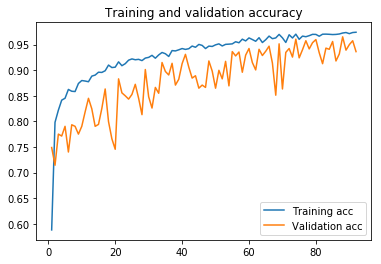

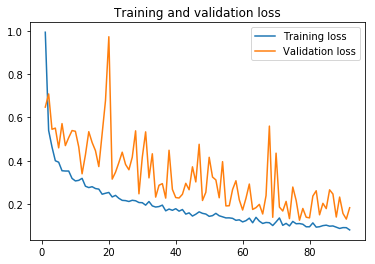

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[[50  0  0]
 [ 2 93  0]
 [ 0  0 79]]
Classification Report
              precision    recall  f1-score   support

Early_blight       0.96      1.00      0.98        50
 Late_blight       1.00      0.98      0.99        95
     healthy       1.00      1.00      1.00        79

   micro avg       0.99      0.99      0.99       224
   macro avg       0.99      0.99      0.99       224
weighted avg       0.99      0.99      0.99       224



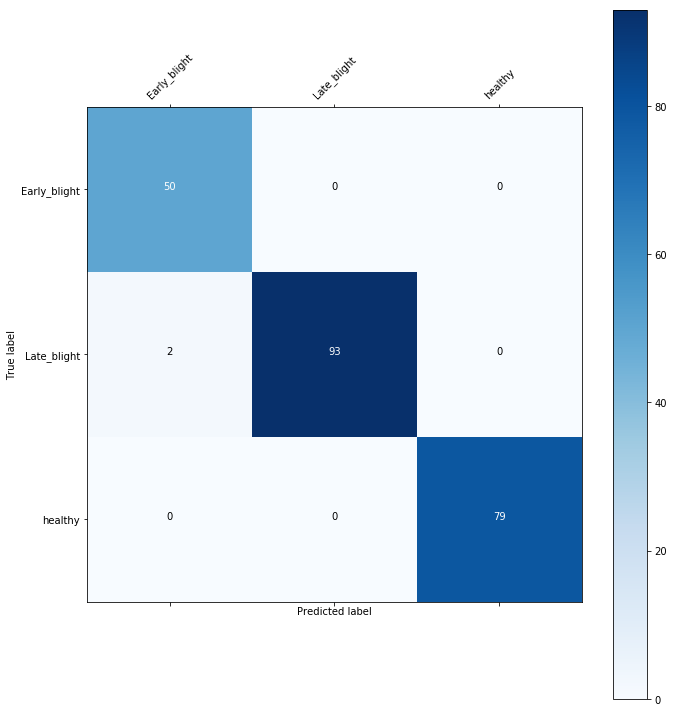

In [5]:
#num_of_test_samples = 2719 
#Y_pred = model.predict_generator(validation_generator, num_of_test_samples // 32+1)
#y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

test_generator.reset()
names, index = getTargetNames(test_generator)
num_of_test_samples = 223#674#1072 #1619
steps=np.ceil(num_of_test_samples//32)+1
Y_pred = model.predict_generator(test_generator,steps=steps)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
confusion = confusion_matrix(test_generator.classes, y_pred, index)
print(confusion)

classes = range(3)

# create confusion matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
cmap=plt.cm.Blues
plt.imshow(confusion, interpolation='nearest', cmap=cmap)
#plt.title('confusion matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, names, rotation=45)
plt.yticks(tick_marks, names)
#plt.yticks(tick_marks, names)

thresh = confusion.max()/2
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, confusion[i, j], horizontalalignment='center', color='white' if confusion[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=names))